In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
#import warnings
#warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from scipy import stats

In [627]:
df = pd.read_csv('titanic_dataset.csv')

In [628]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [629]:
df.shape

(891, 12)

In [630]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [631]:
#dropping few columns
df = df.drop('Name', axis=1,)
df = df.drop('Ticket', axis=1,)
#df = df.drop('Fare', axis=1,)
df = df.drop('Cabin', axis=1,)

In [632]:
df 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [633]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Density'>

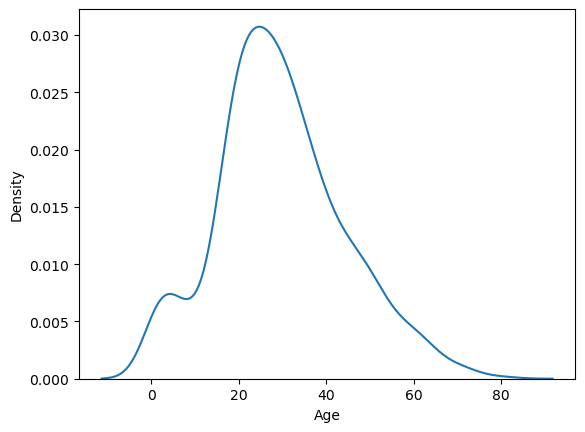

In [634]:
sns.kdeplot(df['Age']) #plotting age column

In [635]:
df['Age'].mean()

29.69911764705882

In [636]:
df['Age'].std()

14.526497332334044

In [637]:
df_age = np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean()+df['Age'].std(),177)

In [638]:
df['Age'][df['Age'].isnull()] = df_age

In [639]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [640]:
#df['Age'] = df['Age'].fillna(df['Age'].median())

In [641]:
#df.isnull().sum()

In [642]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.477183,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.515066,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [643]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [644]:
df['Embarked'].isnull().sum()

2

In [645]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [646]:
df['Embarked'] = df['Embarked'].fillna('S')

In [647]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [648]:
#EDA

In [649]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [650]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [651]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [652]:
df['Family'] = df['SibSp'] +df['Parch'] + 1

In [653]:
df['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [654]:
def cal(number):
    if(number==1):
        return "Alone"
    elif number>1 and number<5:
        return "Medium"
    else:
        return "Large"

In [655]:
df['Family_size']=df['Family'].apply(cal)

In [656]:
df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,1,0,3,male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,male,35.0,0,0,8.0500,S,1,Alone
5,6,0,3,male,18.0,0,0,8.4583,Q,1,Alone
6,7,0,1,male,54.0,0,0,51.8625,S,1,Alone
7,8,0,3,male,2.0,3,1,21.0750,S,5,Large
8,9,1,3,female,27.0,0,2,11.1333,S,3,Medium
9,10,1,2,female,14.0,1,0,30.0708,C,2,Medium


In [657]:
df = df.drop('SibSp',axis=1)

df = df.drop('Parch',axis=1)

df = df.drop('Family',axis=1)
df = df.drop('PassengerId',axis=1)


In [658]:
df.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [659]:
df.shape

(891, 7)

In [660]:
df=pd.get_dummies(df,columns =['Pclass','Sex','Embarked','Family_size'],drop_first=True)

In [661]:
df

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,1,0,0
887,1,19.0,30.0000,0,0,0,0,1,0,0
888,0,25.0,23.4500,0,1,0,0,1,0,1
889,1,26.0,30.0000,0,0,1,0,0,0,0


In [662]:
df.shape

(891, 10)

<AxesSubplot:xlabel='Fare'>

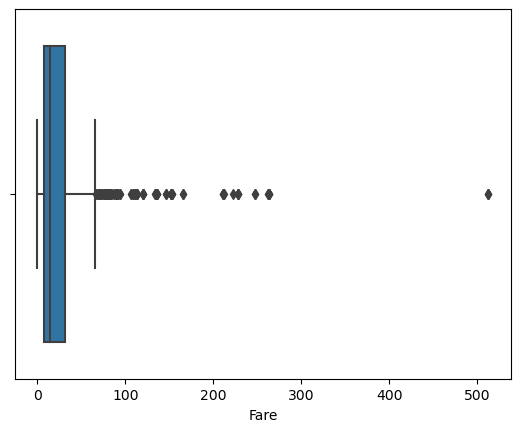

In [663]:
#Outliers
sns.boxplot(df['Fare'],data=df)

<AxesSubplot:xlabel='Age'>

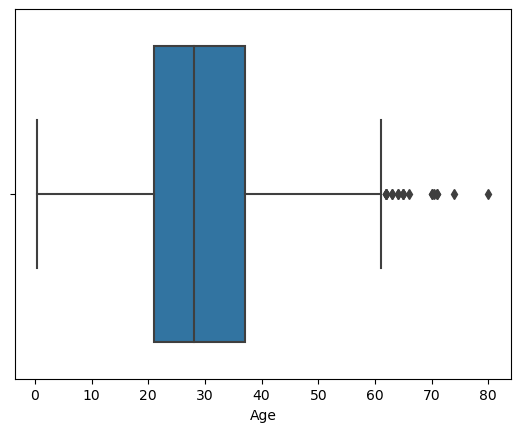

In [664]:
sns.boxplot(df['Age'],data=df)

In [665]:
print('skewness value of Age: ',df['Age'].skew())
print('skewness value of Fare: ',df['Fare'].skew())
#skewness should be between -1 and 1, so below we will manage outliers in Fare columnFare

skewness value of Age:  0.423806327085567
skewness value of Fare:  4.787316519674893


In [666]:
#Outliers
IQR =stats.iqr(df.Fare,interpolation='midpoint')
IQR

23.0896

In [667]:
Q1=df.Fare.quantile(0.25)
Q3=df.Fare.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-26.724, 65.6344)

In [668]:
df.loc[df.Fare<min_limit]

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium


In [669]:
df.loc[df.Fare>max_limit]

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium
1,1,38.0,71.2833,0,0,0,0,0,0,1
27,0,19.0,263.0000,0,0,1,0,1,1,0
31,1,36.0,146.5208,0,0,0,0,0,0,1
34,0,28.0,82.1708,0,0,1,0,0,0,1
52,1,49.0,76.7292,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
846,0,35.0,69.5500,0,1,1,0,1,1,0
849,1,34.0,89.1042,0,0,0,0,0,0,1
856,1,45.0,164.8667,0,0,0,0,1,0,1
863,0,22.0,69.5500,0,1,0,0,1,1,0


In [670]:
df.loc[df['Fare']>max_limit,'Fare']=np.median(df.Fare)

In [671]:
df.loc[df.Fare>max_limit]

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium


<AxesSubplot:xlabel='Fare'>

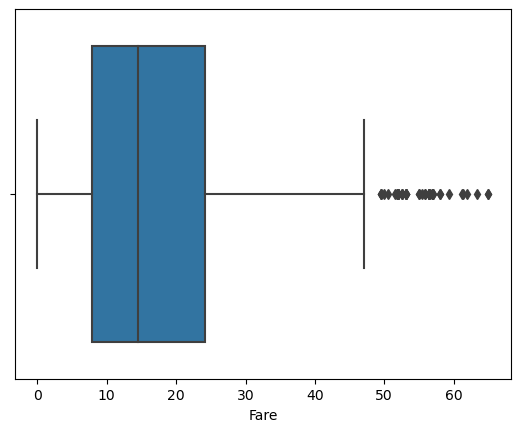

In [672]:
sns.boxplot(df['Fare'],data=df)

In [ ]:
#Giving values to x and y variable

In [673]:
y = df['Survived']
x = df.drop(['Survived'],axis=1)

In [674]:
#Splitting into Test data and Train data

In [675]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [676]:
x_train.shape

(712, 9)

In [677]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [678]:
x_train

array([[ 1.20740714,  0.90855011, -0.51880845, ...,  0.59248936,
        -0.27776937, -0.69522179],
       [-0.46155143, -0.33125803,  1.92749365, ...,  0.59248936,
        -0.27776937, -0.69522179],
       [ 0.206032  , -0.73719521, -0.51880845, ...,  0.59248936,
        -0.27776937, -0.69522179],
       ...,
       [ 0.87361542, -0.24260775, -0.51880845, ...,  0.59248936,
        -0.27776937,  1.4383899 ],
       [-1.12913486, -0.21494003, -0.51880845, ...,  0.59248936,
        -0.27776937,  1.4383899 ],
       [-0.6099033 , -0.21494003, -0.51880845, ...,  0.59248936,
        -0.27776937,  1.4383899 ]])

# Building and Evaluating SVM MODEL

In [679]:
#linear
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [680]:
y_pred_svm = svmclf.predict(x_test)

In [681]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [682]:
print("accuracy =",accuracy_score(y_test,y_pred_svm))

accuracy = 0.7932960893854749


In [683]:
print(confusion_matrix(y_test,y_pred_svm))

[[92 13]
 [24 50]]


In [684]:
#rbf
svmclf = SVC(kernel = 'rbf')
svmclf.fit(x_train,y_train)
y_pred_svm = svmclf.predict(x_test)
print("accuracy =",accuracy_score(y_test,y_pred_svm))

accuracy = 0.8156424581005587


In [685]:
#poly
svmclf = SVC(kernel = 'poly')
svmclf.fit(x_train,y_train)
y_pred_svm = svmclf.predict(x_test)
print("accuracy =",accuracy_score(y_test,y_pred_svm))

accuracy = 0.8268156424581006


# KFOLD VALIDATION -SVM MODEL

In [686]:
#KFOLD FOR SVM
from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [687]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [688]:
#svm - Kfold
from sklearn.model_selection import cross_val_score

In [689]:
cv_score=cross_val_score(svmclf,x,y,cv=kfold_validator)

In [690]:
cv_score

array([0.57777778, 0.73033708, 0.62921348, 0.53932584, 0.60674157,
       0.68539326, 0.62921348, 0.6741573 , 0.68539326, 0.66292135])

In [691]:
np.mean(cv_score) #average score

0.6420474406991261

# STRATIFIED K FOLD VALIDATION - SVM MODEL 

In [692]:
#stratified for svm
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(10)

In [693]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [694]:
from sklearn.model_selection import cross_val_score

In [695]:
skcv_score=cross_val_score(svmclf,x,y,cv=skfold_validator)

In [696]:
skcv_score

array([0.58888889, 0.62921348, 0.64044944, 0.64044944, 0.65168539,
       0.66292135, 0.66292135, 0.68539326, 0.65168539, 0.64044944])

In [697]:
np.mean(skcv_score)#average score

0.6454057428214731

# BUILDING AND EVALUATING KNN MODEL

In [698]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred_knn = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

In [699]:
metric_k

[0.8100558659217877,
 0.8156424581005587,
 0.8268156424581006,
 0.8268156424581006,
 0.8268156424581006,
 0.8268156424581006,
 0.8491620111731844,
 0.8435754189944135,
 0.8268156424581006,
 0.8212290502793296,
 0.8100558659217877,
 0.8156424581005587,
 0.8156424581005587,
 0.8100558659217877]

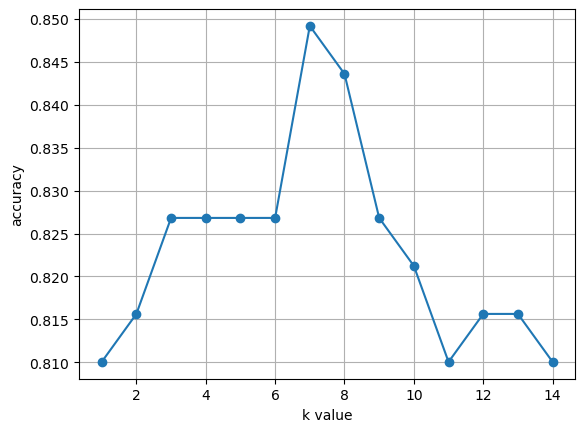

In [700]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [701]:

classifier = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred_knn= model.predict(x_test)
acc = accuracy_score(y_test,y_pred_knn)
metric_k.append(acc)

In [702]:
y_pred_knn

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [703]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
result = confusion_matrix(y_test,y_pred_knn)
print('Confusion Matrix:\n', result)
result1 = classification_report(y_test,y_pred_knn)
print('Classification Report:\n',result1)
result2 = accuracy_score(y_test,y_pred_knn)
print('Accuracy:\n',result2)

Confusion Matrix:
 [[92 13]
 [14 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       105
           1       0.82      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

Accuracy:
 0.8491620111731844


# K FOLD VALIDATION - KNN MODEL

In [704]:
#kfold for knn

from sklearn.model_selection import KFold
kfold_validator=KFold(10)

In [705]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [706]:
from sklearn.model_selection import cross_val_score

In [707]:
cv_score=cross_val_score(model,x,y,cv=kfold_validator)

In [708]:
cv_score

array([0.64444444, 0.65168539, 0.68539326, 0.65168539, 0.65168539,
       0.74157303, 0.6741573 , 0.6741573 , 0.75280899, 0.71910112])

In [709]:
np.mean(cv_score) #average score

0.6846691635455681

# STRATIFIED K FOLD VALIDATION - KNN MODEL

In [710]:
#stratified for knn
from sklearn.model_selection import StratifiedKFold
skfold_validator=StratifiedKFold(10)

In [711]:
for train_index,test_index in skfold_validator.split(x,y):
    print('Training index:',train_index)
    print('Testing index:',test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [712]:
from sklearn.model_selection import cross_val_score

In [713]:
skcv_score=cross_val_score(model,x,y,cv=skfold_validator)

In [714]:
skcv_score

array([0.64444444, 0.60674157, 0.6741573 , 0.65168539, 0.66292135,
       0.73033708, 0.69662921, 0.66292135, 0.75280899, 0.70786517])

In [715]:
np.mean(skcv_score) #average score

0.679051186017478